# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import generate_random_colors

# load data
df = pd.read_excel('alldata.xlsx')


In [140]:

# group data by party
grouped_by_party = df.groupby(['parti'])

# display average age
display(grouped_by_party['alder'].mean().round(1))


parti
Alternativet                                   46.0
Danmarksdemokraterne                           51.2
Dansk Folkeparti                               45.5
Det Konservative Folkeparti                    42.9
Enhedslisten                                   40.5
Frie Grønne, Danmarks Nye Venstrefløjsparti    34.8
Kristendemokraterne                            49.0
Liberal Alliance                               36.9
Løsgænger                                      48.0
Moderaterne                                    44.3
Nye Borgerlige                                 47.6
Radikale Venstre                               45.0
Socialdemokratiet                              44.3
Socialistisk Folkeparti                        40.9
Venstre                                        46.7
Name: alder, dtype: float64

In [141]:
# create a data frame where for each element value is true if the coressponding value was 2 or -2, otherwise false
count = (df == 2) | (df == -2)

# create a confidance column with sum of true values from count dataframe
df['confidence'] = count.sum(axis=1)

# select name and confidence from df and sort the values based on confidence in descending order
df[['navn', 'confidence']].sort_values(by='confidence', ascending=False)

,navn,confidence
505,Sarah Nørris,49
88,Søren Vanting,49
559,Kim Andkjær Doberck,44
152,Rashid Ali,43
44,Mohamed Abdikarim,43
...,...,...
226,Halima El Abassi,2
509,Michael Mikkelsen,0
643,Søren Lund Hansen,0
699,Kasper Roug,0


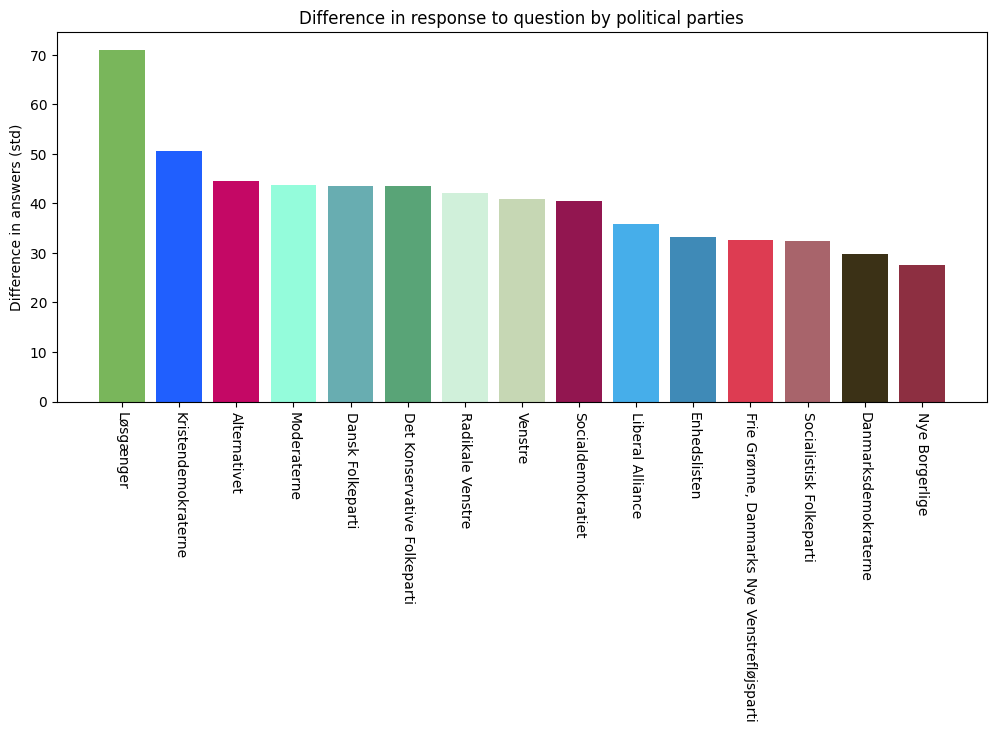

In [161]:

drop_cols = ['storkreds', 'navn', 'alder', 'confidence']
questions_df = df.drop(columns=drop_cols)

# group data by party
grouped_by_party = questions_df.groupby(['parti'])

# calculate standard deviation for each question group by party
std_by_question = grouped_by_party.std()

# sum question together, sort in descending order
std_by_party = std_by_question.sum(axis=1).sort_values(ascending=False)

# get keys and values of standard deviation summed up
parties = std_by_party.keys()
values = std_by_party.values

# plotting data
fig, ax = plt.subplots()

fig.set_figwidth(12)

colors = generate_random_colors(len(parties))

ax.set_ylabel('Difference in answers (std)')
ax.set_title('Difference in response to question by political parties')
ax.bar(parties, values, color=colors)
ax.tick_params(axis='x', labelrotation=270)

plt.show()



According to my analysis, Losgaenger is the party that has the most disagreements. Nye Borgerlige on the other hand, is that party that has the least disagreements.

In [ ]:
# Difference between candidates